In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/nakahara/.pyenv/versions/anaconda2-4.2.0/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [37]:
class FDA(object):
    def __init__(self, num_eigen):
        self.num_eigen = num_eigen #抽出する固有ベクトルの数
        
    #クラス間・クラス内散布行列を求める    
    def _disp_diagram(self, X, y):
        classes = np.unique(y)
        n_classes = dict(zip(classes, np.bincount(y)))
        avg_classes = dict(zip(classes, np.array([np.mean(X[y == c], axis = 0) for c in classes])))
        class_num = len(classes)
        intra_disp, inter_disp = np.zeros((class_num, class_num)), np.zeros((class_num, class_num))
        for c in classes:
            intra_disp += n_classes[c] * np.matmul(avg_classes[c][:, np.newaxis], avg_classes[c][np.newaxis, :])
            for x in X[y == c]:
                delta_avg = x - avg_classes[c]
                inter_disp += np.matmul(delta_avg[:, np.newaxis], delta_avg[np.newaxis, :])
        return inter_disp, intra_disp
        
    def fit_transform(self, X, y):
        self.X, self.y = X, y
        inter_disp, intra_disp = self._disp_diagram(X, y)
        # 一般化固有値問題を解く: S(b)ξ = λS(w)ξ
        #print inter_disp, intra_disp
        tmp = np.matmul(inter_disp, np.linalg.inv(intra_disp))
        la, v = np.linalg.eig(tmp)
        largest_la = np.argsort(la)[-self.num_eigen:]
        self.T = v[largest_la]
        return self.transform(X)
    
    def transform(self, X):
        return self.T.transpose().dot(self.T).dot(X.transpose())

In [42]:
n = 100
X = np.random.randn(4*n).reshape((2*n, 2))
X[:n, 0] = X[:n, 0] - 4
X[n:, 0] = X[n:, 0] + 4
y = np.array([0]*n + [1]*n)
fda = FDA(num_eigen=1)
_ = fda.fit_transform(X, y)

In [43]:
fda.T

array([[ -6.27341959e-04,  -9.89599686e-01]])

In [44]:
def boundary(v):
    idx = np.linspace(-6, 6, 20)
    return pd.Series(-v[0]/v[1] * idx, index = idx)

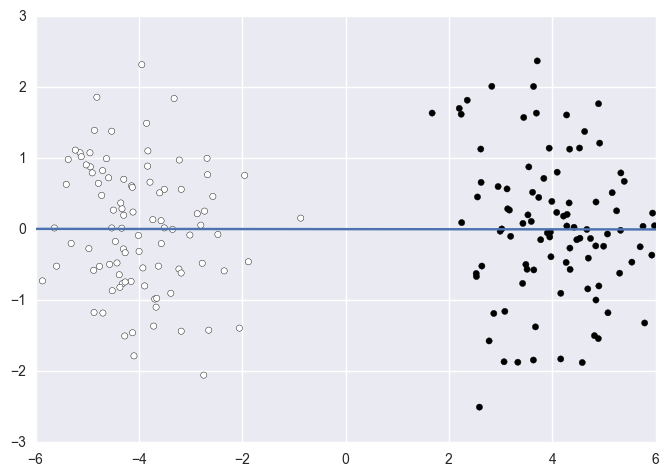

In [46]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)
boundary(fda.T[0]).plot(ax = ax)

In [47]:
n = 100
X = np.random.randn(4*n).reshape((2*n, 2))
X[:n/2, 0] = X[:n/2, 0] - 4
X[-n/2:, 0] = X[-n/2:, 0] + 4
y = np.array([0]*(n/2) + [1]*n + [0]*(n/2))
fda = FDA(num_eigen=1)
_ = fda.fit_transform(X, y)

(-4, 4)

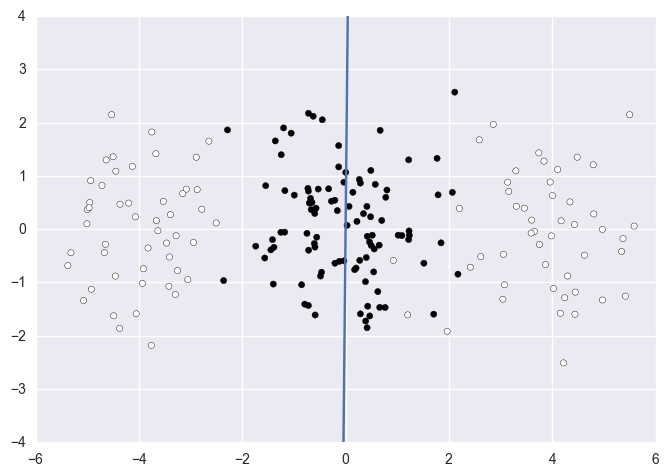

In [49]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)
boundary(fda.T[0]).plot(ax = ax)
ax.set_ylim(-4, 4)